# Number of New All-Time Highs (ATH) per Year Analysis

## Overview
This notebook analyzes the relationship between the number of new all-time highs (ATH) achieved within a calendar year and the asset's annual performance. The analysis focuses on understanding whether the frequency of new highs can serve as a predictive indicator for both current year returns and subsequent year performance.

## Methodology
The analysis employs the following approach:

1. **Data Processing**: Download historical price data and identify new all-time highs on a yearly basis
2. **Feature Engineering**: Calculate rolling maximum prices within each calendar year and identify when daily closes exceed previous year-to-date maximums
3. **Statistical Analysis**: Examine the relationship between new high frequency and annual returns
4. **Predictive Analysis**: Investigate whether current year new highs can predict next year performance

## Key Findings Summary

### Current Year Performance Analysis (26 years analyzed)

**Positive vs Negative Years:**
- **Positive Years**: Average of 29.4 new highs (range: 10-58)
- **Negative Years**: Average of 7.0 new highs (range: 1-19)
- **Overall positive year probability**: 76.9%

**New Highs Threshold Analysis:**
The probability of a positive year increases significantly with the number of new highs:
- **≥ 5 new highs**: 87.0% positive probability
- **≥ 10 new highs**: 95.2% positive probability  
- **≥ 20 new highs**: 100.0% positive probability
- **≥ 30 new highs**: 100.0% positive probability

**Key Insight**: Years with 10 or more new highs have shown a 95.2% probability of positive returns, while years with 20+ new highs have historically always been positive.

### Next Year Prediction Analysis (25 years analyzed)

**Predictive Power Limitations:**
- **Years with positive next year**: Average of 23.4 new highs in current year
- **Years with negative next year**: Average of 27.2 new highs in current year
- **Overall next year positive probability**: 76.9%

**Threshold Analysis for Next Year:**
- **≥ 0 new highs**: 76.9% next year positive
- **≥ 5 new highs**: 78.3% next year positive
- **≥ 10 new highs**: 76.2% next year positive
- **≥ 20 new highs**: 75.0% next year positive
- **≥ 30 new highs**: 72.7% next year positive

**Key Insight**: The number of new highs in the current year shows limited predictive power for next year's performance, with probabilities remaining relatively stable around 75-78% regardless of threshold.

## Conclusions

1. **Strong Current Year Indicator**: The number of new ATHs is an excellent indicator of current year performance, with higher counts strongly correlating with positive returns.

2. **Limited Predictive Power**: New high frequency does not reliably predict next year's performance, suggesting market returns follow a more random walk pattern year-over-year.

3. **Risk Management Insight**: Years with fewer than 10 new highs show significantly higher probability of negative returns, potentially useful for risk assessment.

4. **Market Efficiency**: The lack of predictive power for subsequent years supports the efficient market hypothesis, where past performance patterns don't persist across calendar boundaries.

## Applications
- **Portfolio Management**: Use new high frequency as a real-time risk indicator
- **Tactical Allocation**: Consider reducing exposure in years with very few new highs
- **Expectation Setting**: Avoid over-extrapolating strong current year performance to next year predictions

In [19]:
# import necessary libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [20]:
# Select Yahoo Finance ticker symbol
# ticker= "^SPX"
ticker ="GC=F" # Gold Futures

#ticker = "FTSEMIB.MI"
#ticker = "DAX"
#ticker = "^FCHI"
#ticker ="^IBEX"
#ticker = "^RUT"
#ticker = "^DJI"
#ticker = "^NDX"

#ticker = "BTC-USD"
#ticker = "IWDA.AS"
#ticker = "CSSPX.MI"
#ticker = "XLV"

In [21]:
# download historical data from Yahoo Finance
df = yf.download(ticker, start="2000-01-01")

[*********************100%***********************]  1 of 1 completed


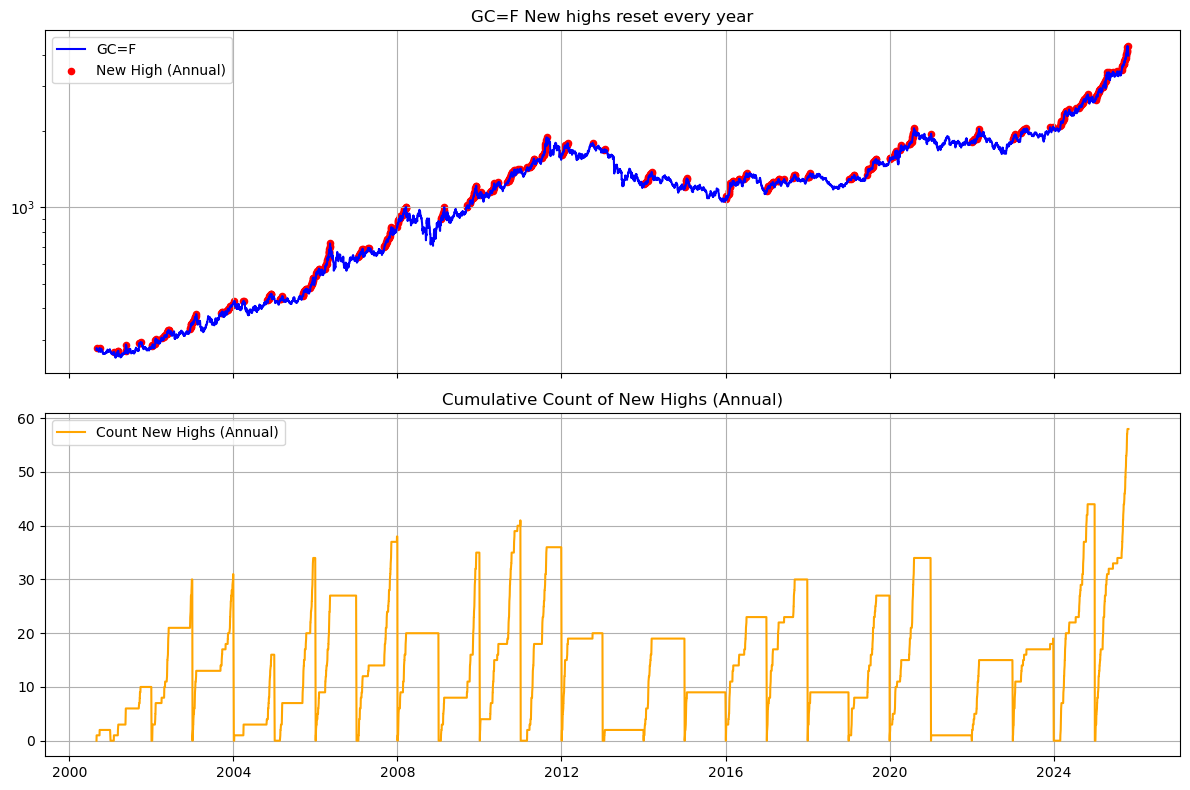

In [22]:
# Flatten the columns if they are a MultiIndex
df.columns = [
    f"{col[0]}_{col[1]}" if col[1] else col[0]
    for col in df.columns
]
# ('Close', '^GSPC') will become 'Close_^GSPC'.
# If the second level of the MultiIndex is empty, it will return only col[0].

# Systematic Data Cleaning
df.sort_index(inplace=True)
df.dropna(inplace=True)

# Select the correct 'Close' column
close_col = [col for col in df.columns if col.startswith("Close")][0]

# Add a 'year' column for grouping
df['year'] = df.index.year

# Calculate the rolling maximum of the 'Close' price within each year
df['rolling_max_year'] = df.groupby('year')[close_col].cummax()

# Shift the rolling maximum by one day to compare today's close with yesterday's rolling max
df['rolling_max_shifted_year'] = df.groupby('year')['rolling_max_year'].shift(1)

# If today's close > yesterday's rolling max (within the same year) => new high
df['is_new_high_year'] = df[close_col] > df['rolling_max_shifted_year']

# Count cumulatively the new highs, *resetting* at the beginning of each year
df['new_high_count_year'] = df.groupby('year')['is_new_high_year'].cumsum()

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# First Chart S&P 500, log scale with red dots for new annual highs
axs[0].set_title(f"{ticker} New highs reset every year")
axs[0].semilogy(df[close_col], label=ticker, color='blue')
axs[0].scatter(
    df.index[df['is_new_high_year']],
    df.loc[df['is_new_high_year'], close_col],
    color='red',
    marker='o',
    s=20,
    label='New High (Annual)'
)
axs[0].legend(loc='best')
axs[0].grid(True)

# Second Chart: Cumulative count of new highs, reset every January 1st
axs[1].set_title("Cumulative Count of New Highs (Annual)")
axs[1].plot(
    df['new_high_count_year'],
    color='orange',
    label='Count New Highs (Annual)'
)
axs[1].legend(loc='best')
axs[1].grid(True)

plt.tight_layout()
plt.show()

    year  number_of_new_highs  first_close   last_close  yearly_return_pct
0   2000                    2   273.899994   272.000000          -0.693682
1   2001                   10   268.399994   278.700012           3.837563
2   2002                   30   278.899994   347.600006          24.632490
3   2003                   31   346.100006   415.700012          20.109796
4   2004                   16   424.399994   437.500000           3.086712
5   2005                   34   428.700012   517.099976          20.620471
6   2006                   27   530.700012   635.200012          19.690974
7   2007                   38   635.200012   834.900024          31.438918
8   2008                   20   857.000000   883.599976           3.103848
9   2009                   35   878.799988  1095.199951          24.624484
10  2010                   41  1117.699951  1421.099976          27.145033
11  2011                   36  1422.599976  1565.800049          10.066082
12  2012                 

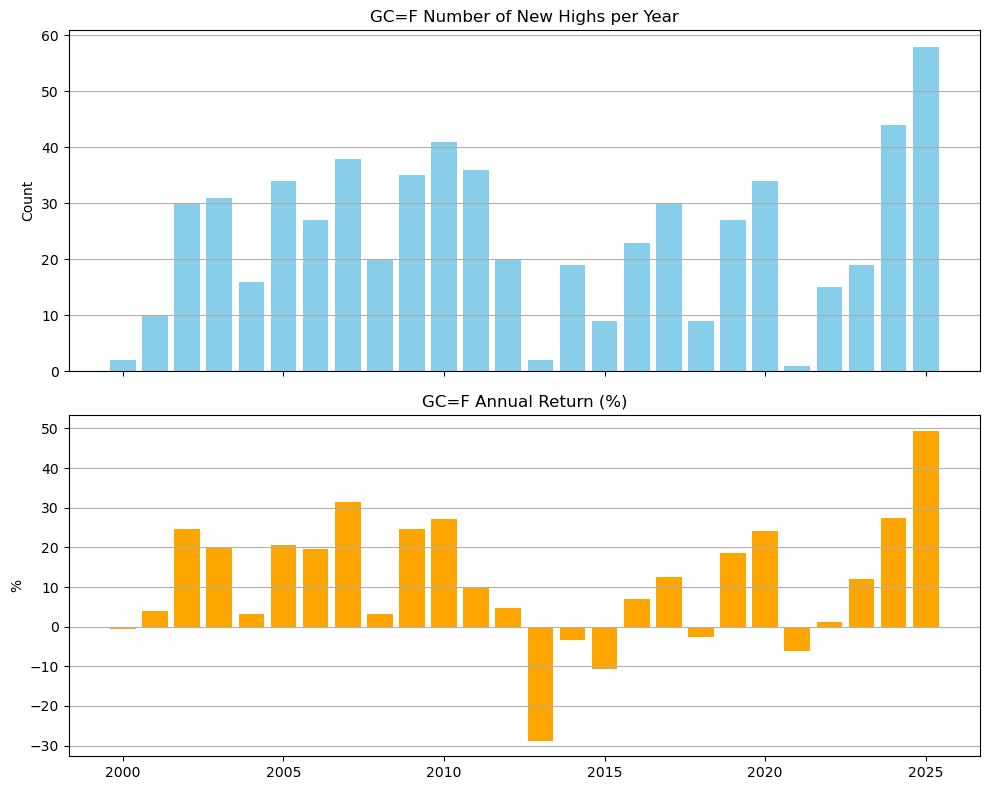

In [23]:
# Select the correct 'Close' column (if needed)
close_col = [col for col in df.columns if col.startswith("Close")][0]

# Group by year to calculate:
yearly_data = (
    df
    .groupby('year')
    .agg(
        number_of_new_highs=('is_new_high_year', 'sum'),  # sum of True values = is_new_high_year
        first_close=(close_col, 'first'),                 # first closing price of the year
        last_close=(close_col, 'last')                    # last closing price of the year
    )
)

# Calculating yearly return in percentage
yearly_data['yearly_return_pct'] = 100.0 * (yearly_data['last_close'] / yearly_data['first_close'] - 1)

# Reset index to show 'year' as a column, for easier printing
yearly_data.reset_index(inplace=True)

# Show the result in a tabular format
print(yearly_data)

# Print some descriptive statistics
print("\nDescriptive Statistics:")
print(yearly_data.describe())

# Plot the results (number of new highs and annual return) in two bar charts
fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Number of new highs
axes[0].bar(yearly_data['year'], yearly_data['number_of_new_highs'], color='skyblue')
axes[0].set_title(f"{ticker} Number of New Highs per Year")
axes[0].set_ylabel("Count")
axes[0].grid(axis='y')

# Annual return in %
axes[1].bar(yearly_data['year'], yearly_data['yearly_return_pct'], color='orange')
axes[1].set_title(f"{ticker} Annual Return (%)")
axes[1].set_ylabel("%")
axes[1].grid(axis='y')

plt.tight_layout()
plt.show()

In [24]:
yearly_data.tail(10)

,year,number_of_new_highs,first_close,last_close,yearly_return_pct
16,2016,23,1075.099976,1150.000000,6.966796
17,2017,30,1160.400024,1306.300049,12.573252
18,2018,9,1313.699951,1278.300049,-2.694672
19,2019,27,1281.000000,1519.500000,18.618267
20,2020,34,1524.500000,1893.099976,24.178418
21,2021,1,1944.699951,1827.500000,-6.026634
22,2022,15,1799.400024,1819.699951,1.128150
23,2023,19,1839.699951,2062.399902,12.105232
24,2024,44,2064.399902,2629.199951,27.359043
25,2025,58,2658.899902,3973.300049,49.433984


In [25]:
yearly_data.describe()

,year,number_of_new_highs,first_close,last_close,yearly_return_pct
count,26.000000,26.000000,26.000000,26.000000,26.000000
mean,2012.500000,24.230769,1147.030754,1280.176926,11.278932
std,7.648529,14.162790,639.060533,819.300473,16.099701
min,2000.000000,1.000000,268.399994,272.000000,-28.793175
25%,2006.250000,15.250000,556.825012,685.125015,1.617790
50%,2012.500000,25.000000,1173.200012,1192.900024,11.085657
75%,2018.750000,34.000000,1580.899963,1647.550049,23.288931
max,2025.000000,58.000000,2658.899902,3973.300049,49.433984


===== NEW HIGHS ANALYSIS VS POSITIVE YEARS =====
Total years analyzed: 26

-- Positive Years --
   Min new highs: 10
   Max new highs: 58
   Mean new highs: 29.4

-- Negative Years --
   Min new highs: 1
   Max new highs: 19
   Mean new highs: 7.0

-- Probability of Positive Year Given New Highs Threshold --
   #NewHighs >=  0:  n=26 years,  76.9% positive
   #NewHighs >=  5:  n=23 years,  87.0% positive
   #NewHighs >= 10:  n=21 years,  95.2% positive
   #NewHighs >= 20:  n=16 years,  100.0% positive
   #NewHighs >= 30:  n=11 years,  100.0% positive
   #NewHighs >= 40:  n=3 years,  100.0% positive
   #NewHighs >= 50:  n=1 years,  100.0% positive
   #NewHighs >= 60:  no historical year with >= 60 new highs
   #NewHighs >= 70:  no historical year with >= 70 new highs


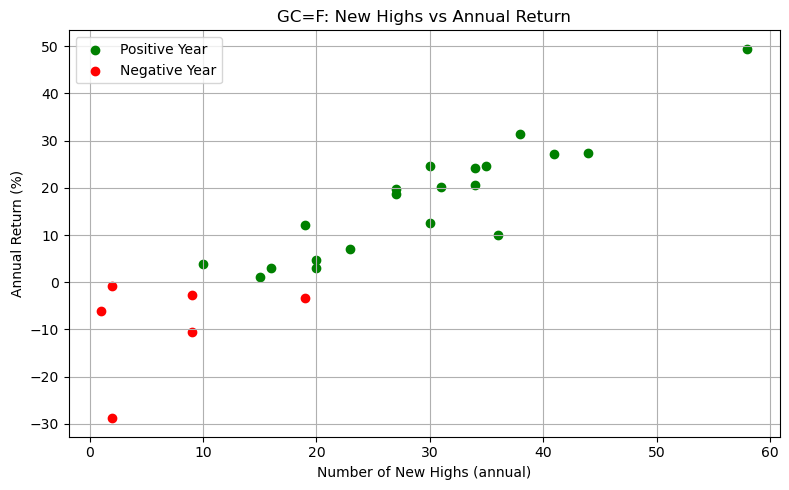

In [26]:
# True column if the year was positive
yearly_data['is_positive_year'] = yearly_data['yearly_return_pct'] > 0

# Split into positive and negative years for descriptive statistics
pos_years = yearly_data[yearly_data['is_positive_year']]
neg_years = yearly_data[~yearly_data['is_positive_year']]

# Print some basic info
print("===== NEW HIGHS ANALYSIS VS POSITIVE YEARS =====")
print(f"Total years analyzed: {len(yearly_data)}")

print("\n-- Positive Years --")
print(f"   Min new highs: {pos_years['number_of_new_highs'].min()}")
print(f"   Max new highs: {pos_years['number_of_new_highs'].max()}")
print(f"   Mean new highs: {pos_years['number_of_new_highs'].mean():.1f}")

print("\n-- Negative Years --")
print(f"   Min new highs: {neg_years['number_of_new_highs'].min()}")
print(f"   Max new highs: {neg_years['number_of_new_highs'].max()}")
print(f"   Mean new highs: {neg_years['number_of_new_highs'].mean():.1f}")

# Show the probability of a positive year given a certain threshold of new highs
print("\n-- Probability of Positive Year Given New Highs Threshold --")
thresholds = [0, 5, 10, 20, 30, 40, 50, 60, 70]  # example thresholds

for t in thresholds:
    subset = yearly_data[yearly_data['number_of_new_highs'] >= t]
    if len(subset) > 0:
        prob_pos = 100.0 * subset['is_positive_year'].mean()
        print(f"   #NewHighs >= {t:2d}:  n={len(subset)} years,  {prob_pos:.1f}% positive")
    else:
        print(f"   #NewHighs >= {t:2d}:  no historical year with >= {t} new highs")

# Scatter Plot: # new highs (X) vs. annual return (Y)
plt.figure(figsize=(8, 5))
plt.title(f"{ticker}: New Highs vs Annual Return")
plt.xlabel("Number of New Highs (annual)")
plt.ylabel("Annual Return (%)")

# - Positive years in green, negative years in red
plt.scatter(
    pos_years['number_of_new_highs'],
    pos_years['yearly_return_pct'],
    color='green', label='Positive Year'
)
plt.scatter(
    neg_years['number_of_new_highs'],
    neg_years['yearly_return_pct'],
    color='red', label='Negative Year'
)

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

===== NEW HIGHS ANALYSIS VS NEXT YEAR =====
Total years analyzed (with next year present): 25

-- Years with Next Year Positive --
   Min new highs (current year): 1
   Max new highs (current year): 44
   Mean new highs: 23.4

-- Years with Next Year Negative --
   Min new highs (current year): 2
   Max new highs (current year): 58
   Mean new highs: 27.2

-- Probability of Positive Next Year Given New Highs Threshold --
   #NewHighs >=  0:  n=26 years,  76.9% positive next
   #NewHighs >=  5:  n=23 years,  78.3% positive next
   #NewHighs >= 10:  n=21 years,  76.2% positive next
   #NewHighs >= 20:  n=16 years,  75.0% positive next
   #NewHighs >= 30:  n=11 years,  72.7% positive next
   #NewHighs >= 40:  n=3 years,  66.7% positive next
   #NewHighs >= 50:  n=1 years,  0.0% positive next
   #NewHighs >= 60:  no historical year with >= 60 new highs
   #NewHighs >= 70:  no historical year with >= 70 new highs


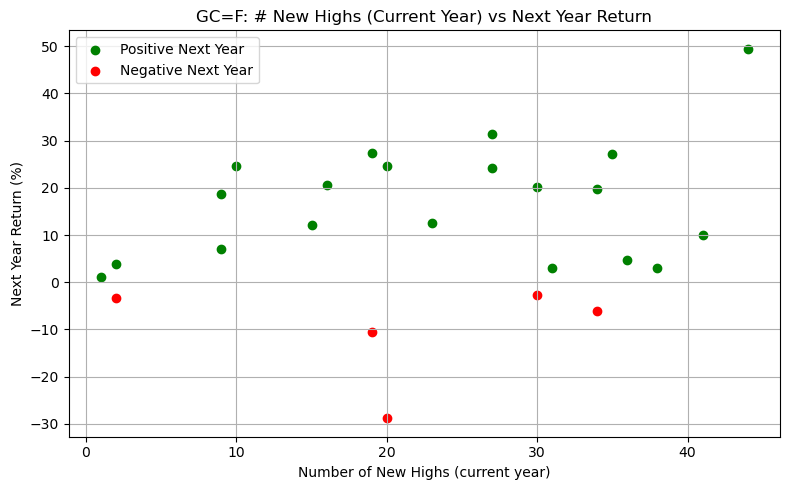

In [27]:
# Starting from 'yearly_data' DataFrame created above
yearly_data = yearly_data.sort_values('year')

# Add the column with NEXT YEAR'S RETURN
yearly_data['next_year_return_pct'] = yearly_data['yearly_return_pct'].shift(-1)

# True column if the NEXT year was positive
yearly_data['is_positive_next_year'] = yearly_data['next_year_return_pct'] > 0

# Split into "years with next year positive" and "years with next year negative"
pos_next = yearly_data[yearly_data['is_positive_next_year']]
neg_next = yearly_data[~yearly_data['is_positive_next_year']]

# Print some basic info
print("===== NEW HIGHS ANALYSIS VS NEXT YEAR =====")
print(f"Total years analyzed (with next year present): {len(yearly_data) - 1}")
# (the last year does not have a "next year" in the data, so one row is lost in shift)

print("\n-- Years with Next Year Positive --")
if len(pos_next) > 0:
    print(f"   Min new highs (current year): {pos_next['number_of_new_highs'].min()}")
    print(f"   Max new highs (current year): {pos_next['number_of_new_highs'].max()}")
    print(f"   Mean new highs: {pos_next['number_of_new_highs'].mean():.1f}")
else:
    print("   No year with next positive (strange!)")

print("\n-- Years with Next Year Negative --")
if len(neg_next) > 0:
    print(f"   Min new highs (current year): {neg_next['number_of_new_highs'].min()}")
    print(f"   Max new highs (current year): {neg_next['number_of_new_highs'].max()}")
    print(f"   Mean new highs: {neg_next['number_of_new_highs'].mean():.1f}")
else:
    print("   No year with next negative (luckily!)")

# Show the probability of a positive next year given a certain threshold of new highs in the current year
print("\n-- Probability of Positive Next Year Given New Highs Threshold --")
thresholds = [0, 5, 10, 20, 30, 40, 50, 60, 70]

for t in thresholds:
    subset = yearly_data[yearly_data['number_of_new_highs'] >= t]
    # Only years that exceed the 't' threshold of new highs
    # (Note: the last year in the dataset does not have "next_year_return_pct", so subset may exclude it)
    if len(subset) > 0:
        prob_pos = 100.0 * subset['is_positive_next_year'].mean()
        print(f"   #NewHighs >= {t:2d}:  n={len(subset)} years,  {prob_pos:.1f}% positive next")
    else:
        print(f"   #NewHighs >= {t:2d}:  no historical year with >= {t} new highs")

# Plot:
#    Asse X = Number of new highs in the current year
#    Asse Y = Annual return of the next year
plt.figure(figsize=(8, 5))
plt.title(f"{ticker}: # New Highs (Current Year) vs Next Year Return")
plt.xlabel("Number of New Highs (current year)")
plt.ylabel("Next Year Return (%)")

# - Years with positive next year in green, negative next year in red
plt.scatter(
    pos_next['number_of_new_highs'],
    pos_next['next_year_return_pct'],
    color='green', label='Positive Next Year'
)
plt.scatter(
    neg_next['number_of_new_highs'],
    neg_next['next_year_return_pct'],
    color='red', label='Negative Next Year'
)

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()